## Tensorflow
다른 package,module에 비해 살짝 특이한 형태의 library
Tensorflow는 3가지 구성요소로 이해하면 쉬움
1. Node: 수학적인 연산, 데이터의 입출력을 담당
2. edge: 동적 데이터를 노드로 실어 나르는 역할
3. Tensor: 다차원배열형태의 동적 데이터 

In [5]:
import tensorflow as tf  # 첫번째에는 warning 뜨고 한 번 더 실행하면 실행됨

node1 = tf.constant("Hello World!!")

## graph를 실행시키기 위해서는 runner가 필요
## session이라고 불리는 runner를 생성함

sess = tf.Session()
sess.run(node1)

print(sess.run(node1).decode())  # decode안하면 앞의 b는 byte string을 나타냄.

Hello World!!


#### 2개의 값을 더하는 tensorflow graph를 생성하고 실행시켜서 값을 구해보자.


In [8]:
import tensorflow as tf

node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)

node3 = node1 + node2 

sess= tf.Session()
sess.run(node3)

print(sess.run(node3))
print(sess.run([node1,node2]))

30.0
[10.0, 20.0]


#### 위의 예제는 실행시키는 시점에 이미 각 노드의 값이 결정되어 있음 
- constant(상수이기 때문에)

#### 만약 실행시키는 시점에 각 노드의 값을 결정해서 실행시키려면 어떻게 해야 할까?


In [13]:
import tensorflow as tf

node1 = tf.placeholder(dtype=tf.float32) # 입력 parameter
node2 = tf.placeholder(dtype=tf.float32)

node3 = node1+node2

sess = tf.Session()
#feed_dict: 입력값 채워줘야 제대로 실행되므로. node1,node2에 dict 형태로 채워주겠다.
result = sess.run(node3, 
                  feed_dict={node1:input(),
                             node2:input()})  

print("덧셈결과:{}".format(result))


10
20
덧셈결과:30.0


# 1224


## linear regression을 Tensorflow를 이용해서 구현해보자!
## 1. 단순선형회귀

참고 블로그: https://datascienceschool.net/view-notebook/55ca1c4c0213445d92ee5a5f297c709f/

In [4]:
# 1. 필요한 module을 import
import tensorflow as tf

# 2. training data set
x_data = [1,2,3]
y_data = [3,5,7]

# 3. placeholder(tensorflow 그래프에 입력을 주기 위한 파라미터 역할)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 4. Weight, bias
W = tf.Variable(tf.random_normal([1]),name="weight") # random한 실수값 1개 지정 
                                                     # 1차함수이므로 W 1개 필요함 
                                                     # [1]:1차원이고 1개 필요 / [1,2]: 2차원이고 1행2열
b = tf.Variable(tf.random_normal([1]),name="bias")  # 이름은 같지만 않으면 아무 이름이나 해도 상관없음     

# 5. Hypothesis 
H = W*x+b  # -> 그래프는 H에 W,x,b가 각각 연결된 형태일 것! 

# 6. Cost function(Loss function)
# 가설에서 y값을 빼고 그 값을 제곱해서 평균을 구해보자!
cost = tf.reduce_mean(tf.square(H-y))

# 7. train node를 생성
# gradient descent : 경사가 가장 빠른 길로 가다보면 가장 빠른 길로 가게될 것! 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)  #경사 빠른 방향으로 얼마나 움직일지 정해줄 수 있음 
train = optimizer.minimize(cost)

# 8. 그래프를 실행시키기 위해서 runner(session)
#    Variable을 사용하면 학습하기 전에 반드시 초기화를 해야 함
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # 초기화 

# 9. learning 작업(학습) 
for step in range(3000):  # 3000번 train node를 실행
    # sess.run(train)   이렇게만 하면 내부적으로는 값이 바뀌지만 결과값으로 나오지 않음
    _,w_val,cost_val,b_val =sess.run([train,W,cost,b],  # _ : 관용적으로 사용하지 않는 변수(변수명)
                                     feed_dict={      # x,y는 placeholder로 잡혀있으므로 feed 해줘야함
                                         x:x_data,
                                         y:y_data})
    if step %300==0: # 300,600,900,1200,..번째에서 값들을 그래프에 찍어보겠다.
        print("W값: {}, b값: {}, cost값: {}".format(w_val,
                                                 b_val,
                                                 cost_val))


W값: [0.25209442], b값: [-2.138957], cost값: 58.11973190307617
W값: [2.4243307], b값: [0.03539643], cost값: 0.13412441313266754
W값: [2.206122], b값: [0.53143704], cost값: 0.03164798021316528
W값: [2.1001246], b값: [0.7723931], cost값: 0.007467621937394142
W값: [2.048636], b값: [0.88943887], cost값: 0.0017620340222492814
W값: [2.0236251], b값: [0.9462946], cost값: 0.00041576483636163175
W값: [2.0114763], b값: [0.97391164], cost값: 9.81060802587308e-05
W값: [2.0055752], b값: [0.9873267], cost값: 2.3152339053922333e-05
W값: [2.0027087], b값: [0.9938427], cost값: 5.465053618536331e-06
W값: [2.001317], b값: [0.9970069], cost값: 1.291578882955946e-06


#### 학습이 끝남! -> 최적의 W와 b값을 찾아내서 H를 만들었음


In [5]:
# prediction
sess.run(H, feed_dict = {x:200}) # 가설이 완료되었으므로

array([401.12698], dtype=float32)

##  실습 - ozone 데이터

In [18]:
# 온도에 따른 Ozone 데이터를 학습한 후 Prediction까지 진행
# 필요한 module을 import
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 선형인지 그래프 그려줄 수 있는 모듈


#### data loading


In [ ]:
# 학습 데이터를 확보해서 전처리 과정을 거쳐야 함
df = pd.read_csv("./data/ozone.csv")
# 데이터 파악하기
# df.head()
# df.shape() : 데이터의 구조 : (153,6)
# df.display()
print("읽어들인 총 데이터의 shape:{}".format(df.shape))


#### 결측치 제거

In [ ]:
# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는 것을 방지하기 위해 필요한 column만 추출
df = pd.DataFrame(df[["Ozone","Temp"]] )
# 결측치 제거 -원본은 유지
df = df.dropna(how="any",inplace=False)
print("결측치를 제거한 후 남은 데이터:{}".format(df.shape))

#### 이상치 제거

- 이상치를 찾기 위해서 Tukey Fence 방식을 이용(IQR방식 이용)
- IQR값 = 3사분위값 - 1사분위값
- 만약 (3사분위값+IQR*1.5)을 초과하는 값이 존재하면 이상치
- 만약 (1사분위값-IQR*1.5) 미만의 값이 존재하면 이상치

131.125
이상치를 제거한 후 남은 데이터:(114, 2)


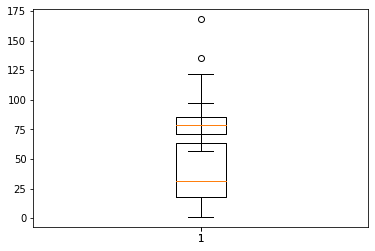

In [40]:
# 각 column(온도와 오존)에 대해서 boxplot을 그려보자.
plt.boxplot(df["Temp"])  # 온도는 이상치 없음
plt.boxplot(df["Ozone"])  # 오존은 이상치 있음 

q1,q3 = np.percentile(df["Ozone"],[25,75])
# 1사분위 : 18.0 , 3사분위 : 63.25
iqr = q3-q1
upper = q3+iqr*1.5
print(upper)  # 131.125
mask = df["Ozone"]>upper
df = df.loc[~mask]   # ~: not의 의미

print("이상치를 제거한 후 남은 데이터:{}".format(df.shape)) # (114, 2)


#### linear regression을 하기 전에, 데이터가 선형관계 이루고 있는지 경향성 확인
- 산점도(scatter)를 이용하여 데이터의 경향성을 확인해 보자.




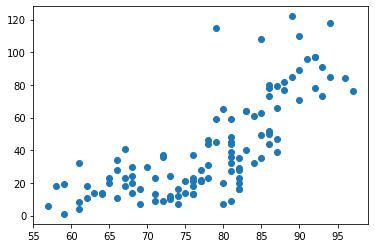

In [41]:
plt.scatter(df["Temp"],df["Ozone"])


In [58]:
# linear regression
# 1. training data set 준비
x_data = df["Temp"] 
y_data = df["Ozone"]
# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# 3. Weight & bias를 정의
W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")
# 4. 가설(Hypothesis)정의
H = W*x+b
# 5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))
# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001) # 기준이 0.01 -> cost보고 조절해나가는 것
train = optimizer.minimize(cost)
# 7. session: 초기화 작업
sess = tf.Session()  # graph를 실행시키기 위해 필요
sess.run(tf.global_variables_initializer())
# 8. 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost], 
                          feed_dict={x:x_data,
                                     y: y_data})
    if step %300==0:
        print("cost값은:{}".format(cost_val))

cost값은:4830.58154296875
cost값은:668.6211547851562
cost값은:668.1170043945312
cost값은:667.61376953125
cost값은:667.1114501953125
cost값은:666.6098022460938
cost값은:666.1092529296875
cost값은:665.6097412109375
cost값은:665.1107177734375
cost값은:664.61279296875
cost값은:664.11572265625
cost값은:663.6195678710938
cost값은:663.124267578125
cost값은:662.6298828125
cost값은:662.13623046875
cost값은:661.6434326171875
cost값은:661.1517333984375
cost값은:660.6607666015625
cost값은:660.170654296875
cost값은:659.6812744140625
cost값은:659.1929931640625
cost값은:658.7054443359375
cost값은:658.2188110351562
cost값은:657.73291015625
cost값은:657.2479248046875
cost값은:656.7639770507812
cost값은:656.2806396484375
cost값은:655.79833984375
cost값은:655.3168334960938
cost값은:654.8360595703125
cost값은:654.3562622070312
cost값은:653.877197265625
cost값은:653.3991088867188
cost값은:652.921875
cost값은:652.4453735351562
cost값은:651.9697265625
cost값은:651.4949951171875
cost값은:651.0211181640625
cost값은:650.5479125976562
cost값은:650.07568359375
cost값은:649.6041870117188
cost값은

- 우리가 조절할 수 있는 값: learning rate , 학습 횟수 

but, cost 0에 가까운 값 나오지 않음

- 이유? 
원래 데이터의 단위값 차이가 클수록 제대로 학습할 수 없음

-> 학습하기 적절한 전처리를 한 번 더 해줘야 함 (표준화 or 정규화)








 정제된 데이터를 정규화나 표준화를 이용해서 값의 범위를 조절해야 함! 
 
 -> 그래야 학습이 정상적으로 이루어질 수 있음
 
데이터를 표준화 방식으로 다시 만들어서 학습을 진행
- Normalization(표준화): 각 데이터를 다음과 같은 방식으로 비율적으로 축소시키는 방식
- 각 요소의 값 => (요소값 - 전체 데이터의 최소값) / (전체 데이터의 최대값-전체 데이터의 최소값)  => 0~1사이 값



C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


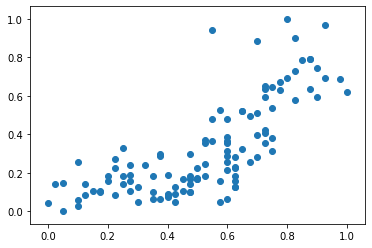

In [69]:
df["Temp_Norm"]= (df["Temp"] - df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())       
    # 결과는 series로 나올 것 -> 모든 온도값 조절된 값으로 출력
df["Ozone_Norm"]= (df["Ozone"] - df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())  

df.head()

#plt.scatter(df["Temp"],df["Ozone"])
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])




In [91]:
# 1. training data set 준비
x_data = df["Temp_Norm"] 
y_data = df["Ozone_Norm"]
# 2. 입력을 받아들이는 node인 placeholder를 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# 3. Weight & bias를 정의
W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")
# 4. 가설(Hypothesis)정의
H = W*x+b
# 5. cost function 정의
cost = tf.reduce_mean(tf.square(H-y))
# 6. train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 기준이 0.01 -> cost보고 조절해나가는 것
train = optimizer.minimize(cost)
# 7. session: 초기화 작업
sess = tf.Session()  # graph를 실행시키기 위해 필요
sess.run(tf.global_variables_initializer())
# 8. 학습
for step in range(3000):
    _,cost_val,W_val,b_val = sess.run([train,cost,W,b], 
                          feed_dict={x:x_data,
                                     y:y_data})
    if step %300==0:
        print("cost값은:{}".format(cost_val))

cost값은:1.5372716188430786
cost값은:0.05964955687522888
cost값은:0.04589308798313141
cost값은:0.03778411075472832
cost값은:0.03300405293703079
cost값은:0.030186312273144722
cost값은:0.028525331988930702
cost값은:0.02754620648920536
cost값은:0.02696903981268406
cost값은:0.026628810912370682


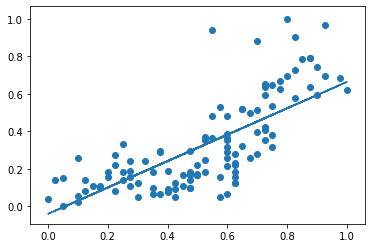

In [92]:
# 학습이 종료된 후 최종적으로 얻은 W와 b의 값을 이용하여 line graph를 산점도와 함께 그려보자. 
plt.scatter(df["Temp_Norm"],df["Ozone_Norm"])
plt.plot(df["Temp_Norm"],df["Temp_Norm"]*sess.run(W)+sess.run(b))   # W와 b는 node이므로 sess.run해줘야 함


#### 학습이 끝났으니 Prediction을 해보자!
#### 화씨 62도에서 오존량을 예측해보자.


In [97]:
# 좌표계가 다르므로 이렇게 62를 대입해서는 안됨!
print(sess.run(H, feed_dict={x:62}))  # 잘못된 결과!!!

# 81를 normalization해 준 값을 넣어줘야 함 !
tmp = (81-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
print(sess.run(H, feed_dict={x:tmp}))   # 이 값은 제대로 된 좌표계의 ozone값이 아님
# ozone값을 원데이터 값으로 바꿔주자.
result_norm = sess.run(H, feed_dict={x:tmp})
result = result_norm*(df["Ozone"].max()-df["Ozone"].min())+df["Ozone"].min()
print(result)

[43.613148]
[0.38226682]
[47.254284]


# 1226

## Review
## 단순선형회귀(simple linear regression)
온도에 따른 오존량의 측정치 데이터를 이용하자!







#### 1. data loading (raw data loading)

In [ ]:
df = pd.read_csv("./data/ozone.csv")
# df.head()

#### 2. 데이터의 전처리를 진행 (Data Pre processiong)








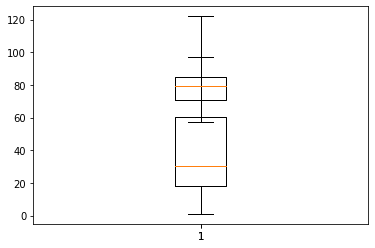

In [25]:
# 2-1. 필요한 column부터 추출
df = df[["Ozone","Temp"]]  # shape: (153,2)
df.head()

# 2-2. 결측치 처리 
df = df.dropna(how="any",inplace=False)
df.shape  # (116, 2) 

# 2-3. 이상치 처리 (Tukey Fences 방식 이용 - IQR 기반)
# 이상치가 존재하는지 확인 -> boxplot으로 확인
plt.boxplot(df["Temp"])  # 이상치 존재 X
plt.boxplot(df["Ozone"])  # 이상치 2개
# IQR값을 구해서 이를 이용해서 상위, 하위 이상치의 boundary를 계산
# IQR = 3사분위값 - 1사분위값
q1,q3 = np.percentile(df["Ozone"],[25,75])  
iqr = q3-q1
# 상위 이상치를 처리하기 위한 경계값
upper = q3+iqr*1.5   # 131.125
# boolean mask 생성
mask = df["Ozone"]>upper 
# 이상치 아닌 값들만 추출
df = df.loc[~mask]  
df  # shape: (114,2)  -> 이상치 2개 처리된 것을 알 수 있음

# 2-4. 데이터가 선형적 관계에 있는지를 확인
# scatter(산점도)를 이용하면 데이터의 관계를 쉽게 파악할 수 있음
# plt.scatter(df["Temp"],df["Ozone"])

# 2-5. 정형화 혹은 표준화를 이용해서 데이터의 scale 변환
# 정규화 = (요소값 - 최소값) / (최대값 - 최소값)
# -> 0~1사이의 값으로 scale
# 표준화(standardization) = (요소값-평균) / 표준편차
# 정규화방식을 이용해서 데이터를 변형
# 일반적으로는 module을 이용. 우리는 프로그램으로 처리 
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())

# 학습에 적합한 데이터를 완성



## machine learning (Tensorflow)
#### 1. training data set


In [28]:
x_data = df["Temp_Norm"]
y_data = df["Ozone_Norm"]

#### 2. placeholder

In [29]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32) 

#### 3. Weight & bias

In [30]:
W = tf.Variable(tf.random_normal([1]),name ="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

#### 4. Hypothesis

In [31]:
H = W*x+b

#### 5. cost function

In [32]:
cost = tf.reduce_mean(tf.square(H-y))

#### 6. train

In [36]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)  # 미분 과정

#### 7. session, 초기화


In [37]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### 8. 학습

In [38]:
for step in range(3000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={x:x_data,
                                   y:y_data})
    if step%300==0:
        print("cost값:{}".format(cost_val))


cost값:0.3462119400501251
cost값:0.07087388634681702
cost값:0.05250969156622887
cost값:0.041684456169605255
cost값:0.03530321642756462
cost값:0.031541623175144196
cost값:0.0293242447078228
cost값:0.028017157688736916
cost값:0.02724664844572544
cost값:0.026792459189891815


최적의 W 와 b를 구했음! -> 가설을 완성

가설을 만든 이유: 예측을 위해서

#### prediction
온도가 화씨 80일 때 Ozone량을 알고싶다.

In [ ]:
print(sess.run(H, feed_dict={x:80})) 
# 이렇게 처리하면 문제가 있음! 
# 우리가 구한 가설은 scale된 데이터로 만든 것이기 때문에 제대로 된 결과 아님


In [40]:
# 80이라는 온도를 0~1사이의 값으로 scale
tmp = (80-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
result_scale = sess.run(H, feed_dict={x:tmp}) # scale된 ozone값
result = result_scale*(df["Ozone"].max()-df["Ozone"].min())+df["Ozone"].min()
print(result)


[45.082558]


## scipy의 stats module을 이용해서 해 보자!

In [42]:
# 학습에 필요한 데이터 scaling 안 해도 됨!
x = df["Temp"] 
y = df["Ozone"]
# 결측치 처리 등 일반적인 전처리는 하고 넣어야 함 

result = stats.linregress(x,y)
print(result)
# slope=2.3448078495502, intercept=-142.190842191332, rvalue=0.7515377011359, pvalue=5.802324426210e-22, stderr=0.19448560867502
print(80*result[0]+result[1])  # result[0]: 기울기, result[1]: 절편  
# => 가설 식 실행한 것


LinregressResult(slope=2.344807849550286, intercept=-142.19084219133276, rvalue=0.7515377011359844, pvalue=5.802324426210489e-22, stderr=0.19448560867502498)
45.39378577269011


## 2. 다중선형회귀 (multiple linear regression)

#### 독립변수가 2개 이상인 경우
Hypothesis가 변경 
- 단순선형회귀 => H = Wx+b
- 다중선형회귀 => H = W1x1+w2x2+...+wnxn+b

결국 matrix 형태로 W와 x가 표현된다.
- H = matmul(X,W)+b


#### 퀴즈성적을 이용한 최종시험성적 예측
- 사용하는 데이터
- 퀴즈1   퀴즈2   퀴즈3   최종성적
- 73      80      75       152   
- 93      88      93       185
- 89      91      90       180
- 96      98     100       196
- 73      66      70       142
- 80      90      50        ?


In [60]:
# training data set
x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,98,100],
          [73,66,70]]
y_data = [[152],[185],[180],[196],[142]]

# placeholder
# 1차원이 아닌 경우에는 shape 잡아줘야 함!
# [5,3]: 값 2개는 2차원. 5행 3열 자료. 
# 그런데 그렇게 써놓으면 데이터를 더 받아들일 수 없고, 
# 나중에 우리가 predict 할 때에도 5행 3열 데이터를 넣어줘야 하므로 행 데이터는 값을 정해놓으면 안됨!
X = tf.placeholder(shape=[None,3], dtype=tf.float32)  
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)  
# weight & bias
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")
# hypothesis
H = tf.matmul(X,W)+b   # matmul: 행렬곱. 순서 주의하기! 
# cost function
# 여기서부터는 동일
cost = tf.reduce_mean(tf.square(H-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001) # 기준이 0.01 -> cost보고 조절해나가는 것
train = optimizer.minimize(cost)

sess = tf.Session()  # graph를 실행시키기 위해 필요
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_val = sess.run([train,cost], 
                          feed_dict={X:x_data,
                                     Y:y_data})
    if step %300==0:
        print("cost값은:{}".format(cost_val))
        
xx = [[80,90,50]]
x_scale = (xx-min(x_data))/(max(x_data)-min(x_data))
result_scale = sess.run(H, feed_dict={x:x_scale}) 
result = result_scale*(y_data.max()-y_data.min())+y_data.min()
print(result)

#print(sess.run(H, feed_dict={X:xx})) 



cost값은:97106.2265625
cost값은:41.22043991088867
cost값은:35.0709342956543
cost값은:29.844097137451172
cost값은:25.4014949798584
cost값은:21.6256046295166
cost값은:18.41620445251465
cost값은:15.688348770141602
cost값은:13.369799613952637
cost값은:11.399068832397461


TypeError: unsupported operand type(s) for -: 'list' and 'list'

## 다중선형회귀 연습문제
관측된 Solar.R, Wind, Temp에 대한 Ozone량에 대한 데이터를 이용하여 machine learning을 진행하고

- solar.R = 170, Wind= 7.4, Temp=67.0

에 대한 Ozone 수치를 예측해라



#### 1. data set 읽어들이기 & 결측치, 이상치 제거

이상치를 제거한 후 남은 데이터:(106, 4)


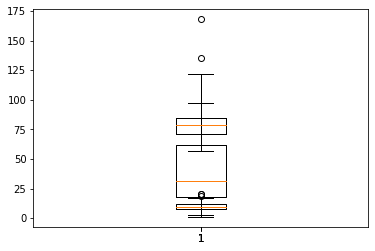

In [282]:
# 1. 데이터 읽어들이기
df = pd.read_csv("./data/ozone.csv")

# 2. 결측치 제거
# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는 것을 방지하기 위해 필요한 column만 추출
df = pd.DataFrame(df[["Solar.R","Wind","Temp","Ozone"]] )
# 결측치 제거 -원본은 유지
df = df.dropna(how="any",inplace=False)

# 3. 이상치 제거
# 각 column(온도와 오존)에 대해서 boxplot을 그려보자.
plt.boxplot(df["Temp"])  # 온도는 이상치 없음
plt.boxplot(df["Ozone"])  # 오존은 이상치 있음 
plt.boxplot(df["Wind"])   # 이상치 있음 - 3개
plt.boxplot(df["Temp"])   # 이상치 없음

# ozone 이상치 제거
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Ozone"]>upper
df = df.loc[~mask]   # ~: not의 의미

# wind 이상치 제거
q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Wind"]>upper
df = df.loc[~mask]   # ~: not의 의미

print("이상치를 제거한 후 남은 데이터:{}".format(df.shape)) # (106, 4)


#### 2. placeholder 

In [221]:
df["Solar.R_Norm"] = (df["Solar.R"]-df["Solar.R"].min())/(df["Solar.R"].max()-df["Solar.R"].min())
df["Wind_Norm"] = (df["Wind"]-df["Wind"].min())/(df["Wind"].max()-df["Wind"].min())
df["Temp_Norm"] = (df["Temp"]-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())
df["Ozone_Norm"] = (df["Ozone"]-df["Ozone"].min())/(df["Ozone"].max()-df["Ozone"].min())

x_data = df[["Solar.R_Norm","Wind_Norm","Temp_Norm"]].values
y_data = df["Ozone_Norm"].values.reshape(-1,1)   # 행은 모르므로 1열 고정하고 나머지는 다 행으로 해라.

X = tf.placeholder(shape=[None,3], dtype=tf.float32)  
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)  

#### 3. weight & bias

In [222]:
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

#### 4. Hypothesis

In [223]:
H = tf.matmul(X,W)+b   # matmul: 행렬곱. 순서 주의하기! 

#### 5. cost function

In [224]:
cost = tf.reduce_mean(tf.square(H-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) # 기준이 0.01 -> cost보고 조절해나가는 것
train = optimizer.minimize(cost)


#### 7. sess

In [227]:
sess = tf.Session()  # graph를 실행시키기 위해 필요
sess.run(tf.global_variables_initializer())

for step in range(30000):
    _,cost_val = sess.run([train,cost], 
                          feed_dict={X:x_data,
                                     Y:y_data})
    if step %3000==0:
        print("cost값은:{}".format(cost_val))
        

cost값은:1.3542256355285645
cost값은:0.03107420727610588
cost값은:0.02817000262439251
cost값은:0.02626570500433445
cost값은:0.024908654391765594
cost값은:0.023889824748039246
cost값은:0.023101622238755226
cost값은:0.022481635212898254
cost값은:0.021989503875374794
cost값은:0.021596862003207207
cost값은:0.021282706409692764
cost값은:0.02103092335164547
cost값은:0.02082892879843712
cost값은:0.02066677249968052
cost값은:0.02053656056523323
cost값은:0.020431963726878166
cost값은:0.020347939804196358
cost값은:0.02028042823076248
cost값은:0.02022617869079113
cost값은:0.020182596519589424
cost값은:0.020147573202848434
cost값은:0.020119432359933853
cost값은:0.02009681798517704
cost값은:0.020078647881746292
cost값은:0.020064042881131172
cost값은:0.020052311941981316
cost값은:0.02004287764430046
cost값은:0.02003530226647854
cost값은:0.020029213279485703
cost값은:0.020024320110678673
cost값은:0.020020388066768646
cost값은:0.0200172271579504
cost값은:0.02001469023525715
cost값은:0.02001264877617359
cost값은:0.02001100964844227
cost값은:0.020009690895676613
cost값은:0.02

In [277]:
#x_val =[[170],[7.4],[67.0]]
SolarR_scale = (170-df["Solar.R"].min())/(df["Solar.R"].max()-df["Solar.R"].min())
Wind_scale = (7.4-df["Wind"].min())/(df["Wind"].max()-df["Wind"].min())
Temp_scale = (67.0-df["Temp"].min())/(df["Temp"].max()-df["Temp"].min())

data = [[SolarR_scale],[Wind_scale],[Temp_scale]]
X_scale = pd.DataFrame(data).values.reshape(-1,3)

result_scale = sess.run(H, feed_dict={X:X_scale})
result = result_scale*(df["Ozone"].max()-df["Ozone"].min())+df["Ozone"].min()
print(result)


[[27.973396]]


## sklearn module을 이용하여 학습시키고 예측해보자! 

### 정답을 알아보자!


In [301]:
from sklearn import linear_model
import numpy as np
import pandas as pd

df = pd.read_csv("./data/ozone.csv")
df = df[["Ozone","Solar.R","Wind","Temp"]]

# 결측치 제거
# 결측치 제거 시 다른 column에 의해서 너무 많은 행이 제거되는 것을 방지하기 위해 필요한 column만 추출
df = pd.DataFrame(df[["Solar.R","Wind","Temp","Ozone"]] )
# 결측치 제거 -원본은 유지
df = df.dropna(how="any",inplace=False)

# ozone 이상치 제거
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Ozone"]>upper
df = df.loc[~mask]   # ~: not의 의미

# wind 이상치 제거
q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Wind"]>upper
df = df.loc[~mask]   # ~: not의 의미


In [303]:
# machine learning - 차원도 안맞춰줘도 됨

X = df[["Solar.R","Wind","Temp"]]
Y = df["Ozone"]

# 선형회귀 할 수 있는 기능 가져오기
lm = linear_model.LinearRegression()
lm.fit(X,Y)

prediction = lm.predict([[170,7.4,67]])
print("예측값은:{}".format(prediction))


예측값은:[27.97594664]


### 다중선형회귀 - 정규화 한번에 하기(패키지)




In [311]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./data/ozone.csv")
df = df.dropna(how="any",inplace=False)

# ozone 이상치 제거
q1,q3 = np.percentile(df["Ozone"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Ozone"]>upper
df = df.loc[~mask]   # ~: not의 의미

# wind 이상치 제거
q1,q3 = np.percentile(df["Wind"],[25,75])
iqr = q3-q1
upper = q3+iqr*1.5
mask = df["Wind"]>upper
df = df.loc[~mask]   # ~: not의 의미

# machine learning
x_data = df[["Solar.R","Wind","Temp"]]
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df["Ozone"].values.reshape(-1,1)
y_data = MinMaxScaler().fit_transform(y_data)




## 지도학습
1. linear regression(선형회귀) -> 기초

    - 단순선형회귀(simple linear regression)

    - 다중선형회귀(multiple linear regression)
    

2. logistic regression(binary classification) -> 기반

    - Email이 스팸인지 아닌지를 판별
    - 내일의 주가가 오를지 떨어질지
    - 신용카드 사용 시 도난카드인지 아닌지를 판별
    
    
    - 알고리즘 중 가장 보편화되고 정확한 알고리즘
    - y_label이 0 혹은 1 (True of False)
    - machine learning의 결과는 확률로 나타난다
    - 0~1 사이의 값으로 출력
    - 일반적으로 0.5 이상이면 1로 간주, 0.5 미만이면 0으로 간주

    - x(시간)    y(결과)
    -    1        F(0)    -> 15
    -    2        F(0)    -> 20
    -    5        F(0)    -> 56
    -    1        P(1)    -> 85
    -   10        P(1)    -> 93
    - linear regression으로 학습한 후 7시간 공부한 결과를 알아보자.
    

In [320]:
import tensorflow as tf
x_data = [1,2,5,8,10,20]
y_data = [0,0,0,1,1,1]

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")
H = W*x+b

cost = tf.reduce_mean(tf.square(H-y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_val = sess.run([train,cost],
                         feed_dict={x:x_data,
                                   y:y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))

        
print(sess.run(H,feed_dict={x:6}))

cost값은:178.3668212890625
cost값은:1.4681745767593384
cost값은:0.10519629716873169
cost값은:0.09469479322433472
cost값은:0.09461390227079391
cost값은:0.09461326152086258
cost값은:0.09461325407028198
cost값은:0.09461326152086258
cost값은:0.09461327642202377
cost값은:0.09461327642202377
[0.39640954]


- x(시간)    y(결과)
-    1        F(0)    
-    2        F(0)    
-    5        F(0)    
-    1        P(1)    
-   10        P(1)   
-   20        P(1)    

20 데이터 하나만 더 들어왔을 뿐인데 
6일때의 결과를 보면 매우 달라진다.(합격률 낮아짐)


# 1227





### logistic regression(binary classification)

- 지도학습에서 데이터의 label이 0 또는 1로 설정
- 이런 데이터는 기존의 선형회귀방식으로는 학습하고 prediction하는게 불가능  
- 가설을 바꿔야 함!
- H = XW + b (다중선형회귀에서 사용한 가설) => 직선 
- 직선이 아닌 0에서 1사이의 값을 가지는 함수로 가설을 표현 
- sigmoid 함수를 이용해서 표현 (가설을 변경해야 한다.)
- 가설이 변경되었기 때문에 해당 가설을 이용한 cost 함수를 그려보면 local minimum(minima)을 찾게 될 여지가 있게 된다. 
- 따라서 cost함수도 변경해야 한다. 
- cost = -ylog(H)-(1-y)log(1-H)  => 수학식을 이용해서 cost함수를 사용




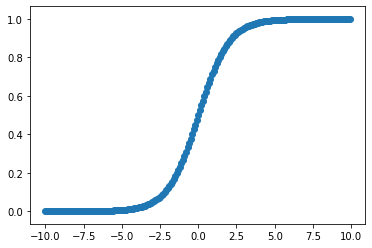

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.1)
y = 1/(1+np.exp(-x))
plt.scatter(x,y)  # 시그모이드 곡선 



#### 사용할 데이터
- 공부시간 어학연수기간 시험성적
-    1         1          0(F)
- 2 0 0(F)
- 5 1 0(F)
- 2 3 1(P)
- 3 3 1(P)
- 8 1 1(P)
- 10 0 1(P)



In [18]:
import tensorflow as tf

# training data set 
x_data = [[1,1],
         [2,0],
         [5,1],
         [2,3],
         [3,3],
         [8,1],
         [10,1]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]

# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# hypothesis (변경되어야 함)
# H = tf.matmul(X,W)+b : 선형회귀
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)   # 1 / (1+e^(-x))  : sigmoid를 이용해서 곡선으로 표현

# cost function(일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels = Y))  # logistic의 cost만들어주는 함수 (tensorflow에서 제공해주는)
# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # global_Variable 초기화

# 학습
for step in range(3000):
    _, cost_val = sess.run([train,cost],feed_dict = {X: x_data,
                                                     Y: y_data})
    if step%300==0:
        print("cost값은:{}".format(cost_val))

# predict
result = sess.run(H, feed_dict={X:[[7,1]]})
print(result)  # 시험에 통과
if result >0.5:
    print("시험에 통과:{}".format(result))
else:
    print("시험에 떨어짐:{}".format(result))

cost값은:1.1680362224578857
cost값은:0.2816517651081085
cost값은:0.20171275734901428
cost값은:0.1649354249238968
cost값은:0.1425197869539261
cost값은:0.12686678767204285
cost값은:0.1150454506278038
cost값은:0.10565859824419022
cost값은:0.09794296324253082
cost값은:0.09143995493650436
[[0.71656156]]
시험에 통과:[[0.71656156]]


## 예제- 대학원 입학시험 예측
-  데이터는 admission.csv이용 
- logistic regression을 수행한 후 prediction을 진행
- 정확도 측정(accuracy) => 응용을 위해서는 98% 이상

In [28]:
## 1. 데이터 읽어들이기 
df= pd.read_csv("./data/admission.csv")
display(df)

## 2. 결측치 제거
# 결측치 제거 -원본은 유지
df = df.dropna(how="any",inplace=False)

## 3. 이상치 제거
#plt.boxplot(df["gre"])   # 하한값 2개 
#plt.boxplot(df["gpa"])   # 하한값 1개
# plt.boxplot(df["rank"])   # 없음

q1,q3 = np.percentile(df["gre"],[25,75])
iqr = q3-q1
lower = q1-iqr*1.5
mask = df["gre"]<lower
df = df.loc[~mask]  

q1,q3 = np.percentile(df["gpa"],[25,75])
iqr = q3-q1
lower = q1-iqr*1.5
mask = df["gpa"]<lower
df = df.loc[~mask]  

print("이상치를 제거한 후 남은 데이터:{}".format(df.shape)) # (395, 4)


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


이상치를 제거한 후 남은 데이터:(395, 4)


In [68]:
## placeholder
df["gre_Norm"] = (df["gre"]-df["gre"].min())/(df["gre"].max()-df["gre"].min())
df["gpa_Norm"] = (df["gpa"]-df["gpa"].min())/(df["gpa"].max()-df["gpa"].min())
df["rank_Norm"] = (df["rank"]-df["rank"].min())/(df["rank"].max()-df["rank"].min())

x_data = df[["gre_Norm","gpa_Norm","rank_Norm"]].values
y_data = df["admit"].values.reshape(-1,1)   # 행은 모르므로 1열 고정하고 나머지는 다 행으로 해라.

X = tf.placeholder(shape=[None,3], dtype=tf.float32)  
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)  

# weight & bias
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

# hypothesis 
# H = tf.matmul(X,W)+b : 선형회귀
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)  

# cost function(일반적으로 tf에서 제공하는 함수를 이용)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels = Y))  # logistic의 cost만들어주는 함수 (tensorflow에서 제공해주는)

# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())  # global_Variable 초기화

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost],feed_dict = {X: x_data,
                                                     Y: y_data})
    if step%10000==0:
        print("cost값은:{}".format(cost_val))

# predict
#result = sess.run(H, feed_dict={X:[[380,3.61,3]]})
#print(result) 

gre_scale = (380-df["gre"].min())/(df["gre"].max()-df["gre"].min())
gpa_scale = (3.61-df["gpa"].min())/(df["gpa"].max()-df["gpa"].min())
rank_scale = (3-df["rank"].min())/(df["rank"].max()-df["rank"].min())

data = [[gre_scale],[gpa_scale],[rank_scale]]
X_scale = pd.DataFrame(data).values.reshape(-1,3)

result = sess.run(H, feed_dict={X:X_scale})
print(result) 




cost값은:0.6669329404830933
cost값은:0.5760520696640015
cost값은:0.576052188873291
[[0.18406785]]


## sklearn module을 이용하여 정답을 알아보자!


In [71]:
from sklearn import linear_model

# machine learning - 차원도 안맞춰줘도 됨
X = df[["gre","gpa","rank"]]
Y = df["admit"]

# 로지스틱 회귀 할 수 있는 기능 가져오기
log = linear_model.LogisticRegression()
log.fit(X,Y)
#log.predict_proba
#prediction = log.predict([[380,3.61,3]])
prediction = log.predict_proba([[380,3.61,3]])
print("예측값은:{}".format(prediction))


예측값은:[[0.81979963 0.18020037]]


## 대학원 예제 선생님 풀이

In [82]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

def change_rank(k):
    if k==4:
        return 1
    elif k==3:
        return 2
    elif k==2:
        return 3
    elif k==1:
        return 4
    
def process_outlier(tmp_df,tmp):
    q1,q3 = np.percentile(tmp,[25,75])
    iqr = q3-q1
    upper = q3+iqr*1.5
    lower = q1-iqr*1.5
    upper_mask = tmp > upper
    lower_mask = tmp < lower
    result_mask = upper_mask | lower_mask
    return tmp_df[~result_mask]

## 1. data loading & 전처리 
df= pd.read_csv("./data/admission.csv")
#display(df.head())

# 상관계수 구해보기 - gre,gpa는 높을수록 admit 잘되고 rank는 낮을수록 admit 잘됨
df.corr()
# rank값을 역순으로 조절해줘야 함 - rank만 역방향이므로 
# 1->4,2->3,3->2,4->1
df["rank"] = df["rank"].apply(lambda x: change_rank(x))   # lambda 쓰면 값 하나하나씩 가져옴, change_rank: 호출할 함수
#display(df.head())

# 결측치 처리 (결측치는 존재하지 않음)
df.isnull().sum()   

# 이상치 처리
df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])

## machine learning
x_data = df[["gre","gpa","rank"]].values    # numpy array
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df["admit"].values.reshape(-1,1)

# placeholder
X = tf.placeholder(shape=[None,3],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([3,1]),name="weight")
b = tf.Variable(tf.random_normal([1]),name="bias")

# hypothesis
logit = tf.matmul(X,W)+b
H = tf.sigmoid(logit)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit,
                                                             labels= Y))
# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## 학습
for step in range(30000):
    _,cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                  Y:y_data})
    if step%3000==0:
        print("cost값은:{}".format(cost_val))
        
# 학습이 종료됨!


## 정확도를 측정해보자! (accuracy)
# test data set이 없음..
# train data set을 test data set으로 사용

# predict한 결과를 알아보자! 
# 특정한 x값을 -> training data set을 이용
# 특정한 x입력에 대해서 1과 0으로 만들어진 예측값
predict = tf.cast(H>0.5,dtype=tf.float32)  
correct = tf.equal(predict,Y)   # 예측결과 - 원본 데이터 같으면 학습 아주 잘 되었다.
                                # 결과는 지금 T,F 형태로 나올 것 -> 0,1 형태로 바꾸기
accuracy = tf.reduce_mean( tf.cast(correct,dtype=tf.float32) )

print("정확도:{}".format(sess.run(accuracy,feed_dict={X:x_data,
                                                  Y:y_data})))

# 모델의 정확도가 70% 이면 사용할 수 없는 모델



cost값은:0.6792475581169128
cost값은:0.576546847820282
cost값은:0.5760599970817566
cost값은:0.5760522484779358
cost값은:0.5760520696640015
cost값은:0.5760520696640015
cost값은:0.5760520696640015
cost값은:0.5760520696640015
cost값은:0.5760520696640015
cost값은:0.5760520696640015
정확도:0.703797459602356


In [ ]:
# training data set의 70%를 학습에 이용
# training data set의 30%를 평가에 이용
# prediction (예측)

In [ ]:
test = pd.read_csv("./data/test.csv")
train = pd.read_csv("./data/train.csv")




